# Debugging notebook for alphaDIA
This notebooks allows you to run a search in a jupyter notebook and debug the results.
It allows you to debug a search on the workflow level as well on the peakgroup level

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.environ["RUST_BACKTRACE"] = "1"

from alphabase.spectral_library.base import SpecLibBase

from alphadia import search_step, search_plan
from alphadia.workflow import peptidecentric

os.environ["NUMBA_BOUNDSCHECK"] = "1"
os.environ["NUMBA_DEVELOPER_MODE"] = "1"
os.environ["NUMBA_FULL_TRACEBACKS"] = "1"

/Users/georgwallmann/miniconda3/envs/alpha-rs/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/georgwallmann/miniconda3/envs/alpha-rs/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import tempfile

library_path = '/Users/georgwallmann/Documents/data/alphadia_performance_tests/libraries/astral/hela_hybrid.hdf'
raw_data_path_list = [
    '/Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw',
    '/Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw',
    '/Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw'
]

In [3]:
config = {
    "general": {
        "reuse_calibration": True,
        "reuse_quant": False,
        "thread_count": 10,
    },
    "search": {
        "target_ms1_tolerance": 4,
        "target_ms2_tolerance": 7,
    },
    "raw_paths": raw_data_path_list,
    "library_path": library_path,
    
}
output_folder = "/Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia"
step = search_step.SearchStep(output_folder, config=config)

0:00:00.000638 INFO: Moved old log file /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/log.txt to /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/log.45.bkp.txt
0:00:00.001106 INFO: loading config from /Users/georgwallmann/Documents/git/alphadia/alphadia/constants/default.yaml
0:00:00.011308 INFO: loading additional config provided via CLI
0:00:00.011761 INFO: Updating config with 'user defined'
0:00:00.012101 INFO: ├──version: 1
0:00:00.012332 INFO: ├──workflow_name: None
0:00:00.012640 INFO: ├──output_directory: None
0:00:00.012962 INFO: ├──library_path: /Users/georgwallmann/Documents/data/alphadia_performance_tests/libraries/astral/hela_hybrid.hdf [user defined, default: None]
0:00:00.013159 INFO: ├──raw_paths:
0:00:00.013411 INFO: │   - /Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw [user defined, default:

In [4]:
for raw_name, dia_path, speclib in step.get_run_data():
    pass

0:00:22.866842 PROGRESS: Loading raw file 1/3: 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07
0:00:22.867288 PROGRESS: Loading raw file 2/3: 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06
0:00:22.867532 PROGRESS: Loading raw file 3/3: 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05


In [5]:
workflow = peptidecentric.PeptideCentricWorkflow(
    raw_name,
    step.config,
)
workflow.load(dia_path, speclib)
workflow.search_parameter_optimization()

0:00:24.210129 INFO: Quantification results path: /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/quant
0:00:24.211771 INFO: Initializing RawFileManager
49it [00:13,  3.73it/s]
0:00:39.027606 INFO: Determining DIA cycle
0:00:39.179797 INFO: Found cycle with start 0.00 min and length 301.
0:00:39.282615 INFO: RT (min)            : 0.0 - 20.9
0:00:39.283000 INFO: RT duration (sec)   : 1253.3
0:00:39.283284 INFO: RT duration (min)   : 20.9
0:00:39.283574 INFO: Cycle len (scans)   : 301
0:00:39.283811 INFO: Cycle len (sec)     : 1.55
0:00:39.284022 INFO: Number of cycles    : 806
0:00:39.284219 INFO: MS2 range (m/z)     : 380.4 - 980.7
0:00:39.323806 INFO: Loaded CalibrationManager from /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05/calibration_manager.pkl
0:00:39.324431 INFO: Initializing CalibrationManager
0:00:39.324875 INFO: Disabling ion mobility cali

In [6]:
workflow.calibration_manager.predict(
    workflow.spectral_library._precursor_df, "precursor"
)
workflow.calibration_manager.predict(
    workflow.spectral_library._fragment_df, "fragment"
)

0:00:43.723219 INFO: calibration group: precursor, predicting mz
0:00:43.772680 INFO: calibration group: precursor, predicting rt
0:00:43.869419 INFO: calibration group: fragment, predicting mz


In [7]:
workflow.spectral_library._precursor_df

,charge,decoy,frag_start_idx,frag_stop_idx,mod_seq_charge_hash,mod_seq_hash,nAA,mz_library,rt_norm_pred,rt_library,...,i_0,i_1,i_2,i_3,mono_isotope_idx,flat_frag_start_idx,flat_frag_stop_idx,mobility_library,mz_calibrated,rt_calibrated
0,2,0,0,6,6778347273406786435,6778347273406786433,7,474.764801,0.576842,799.263816,...,0.553370,0.298520,0.115142,0.032967,0,0,11,0.0,474.764056,618.832989
1,2,1,3420637,3420643,6778347273406786435,6778347273406786433,7,460.749146,0.576842,799.263816,...,0.553370,0.298520,0.115142,0.032967,0,3022983,3022994,0.0,460.748407,618.832989
2,2,1,3420643,3420649,15522010155980186642,15522010155980186640,7,419.226898,0.174658,242.178137,...,0.568416,0.289767,0.110687,0.031129,0,3022994,3023003,0.0,419.226182,223.839613
3,2,0,6,12,15522010155980186642,15522010155980186640,7,466.220734,0.174658,242.178137,...,0.568416,0.289767,0.110687,0.031129,0,11,20,0.0,466.219992,223.839613
4,2,1,3420649,3420655,1205537395403030235,1205537395403030233,7,409.218719,0.184828,256.265275,...,0.643259,0.269783,0.072406,0.014552,0,3023003,3023013,0.0,409.218009,231.640694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513282,6,1,6840538,6840583,14784160456303895538,14784160456303895532,46,824.886719,0.668487,926.206576,...,0.098076,0.249675,0.336078,0.316171,0,6045521,6045533,0.0,824.885712,722.781194
513283,5,0,3420147,3420192,9025719130124269792,9025719130124269787,46,904.851868,0.642672,890.448366,...,0.114442,0.269952,0.332343,0.283263,0,3022863,3022875,0.0,904.850775,693.871936
513284,5,1,6840583,6840628,9025719130124269792,9025719130124269787,46,897.649597,0.642672,890.448366,...,0.114442,0.269952,0.332343,0.283263,0,6045533,6045545,0.0,897.648512,693.871936
513289,6,0,3420287,3420337,9293598323953010633,9293598323953010627,51,912.626343,0.823900,1141.476926,...,0.071009,0.216317,0.341506,0.371169,0,3022899,3022911,0.0,912.625241,915.896172


In [8]:
workflow.optimization_manager.fwhm_rt

2.9901161

In [9]:
workflow.optimization_manager.rt_error

113.3773023258967

In [10]:
workflow.optimization_manager.num_candidates

3

In [31]:
from alphadia.peakgroup import search

config = search.HybridCandidateConfig()
config.update(workflow.config["selection_config"])
config.update(
    {
        "rt_tolerance": workflow.optimization_manager.rt_error,
        "mobility_tolerance": workflow.optimization_manager.mobility_error,
        "candidate_count": workflow.optimization_manager.num_candidates,
        "precursor_mz_tolerance": workflow.optimization_manager.ms1_error,
        "fragment_mz_tolerance": workflow.optimization_manager.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

extraction = search.HybridCandidateSelection(
    workflow.dia_data.jitclass(),
    workflow.spectral_library._precursor_df, 
    workflow.spectral_library._fragment_df,
    config.jitclass(),
    rt_column=f"rt_{workflow.optimization_manager.column_type}",
    precursor_mz_column=f"mz_{workflow.optimization_manager.column_type}",
    fragment_mz_column=f"mz_{workflow.optimization_manager.column_type}",
    fwhm_rt=workflow.optimization_manager.fwhm_rt,
    fwhm_mobility=workflow.optimization_manager.fwhm_mobility,
)
candidates_df = extraction(thread_count=workflow.config["general"]["thread_count"])

0:05:44.365970 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:05:44.366455 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:05:44.366794 INFO: FWHM in RT is 2.99 seconds, sigma is 0.41
0:05:44.366943 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:05:44.794740 INFO: Starting candidate selection
100%|██████████| 481467/481467 [00:30<00:00, 15612.70it/s]


In [11]:
from peak_scoring import PeakScoring

config_dict = {
    'fwhm_rt': 3,
    'peak_length': 5,
    'kernel_size': 15,
    'ms1_tolerance': workflow.optimization_manager.ms1_error,
    'ms2_tolerance': 7,
    'rt_tolerance': workflow.optimization_manager.rt_error+10,
}

In [12]:
scoring = PeakScoring(
    workflow.dia_data, 
    workflow.spectral_library._precursor_df, 
    workflow.spectral_library._fragment_df, 
    config_dict,
    rt_column="rt_calibrated",
    mobility_column="mobility_library",
    precursor_mz_column="mz_calibrated",
    fragment_mz_column="mz_calibrated",
)


In [13]:
candidates_df = scoring()

Precursors per second: 601977.44
Found 1442040 candidates


In [14]:
candidates_df = candidates_df.sort_values(by='score', ascending=False).head(5_000_000)

In [15]:
workflow.optimization_manager.column_type

'calibrated'

In [ ]:
from alphadia import plexscoring

config = plexscoring.CandidateConfig()
config.update(workflow.config["scoring_config"])
config.update(
    {
        "precursor_mz_tolerance": workflow.optimization_manager.ms1_error,
        "fragment_mz_tolerance": workflow.optimization_manager.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

candidate_scoring = plexscoring.CandidateScoring(
    workflow.dia_data.jitclass(),
    workflow.spectral_library._precursor_df,
    workflow.spectral_library._fragment_df,
    config=config,
    rt_column=f"rt_{workflow.optimization_manager.column_type}",
    mobility_column=f"mobility_library",
    precursor_mz_column=f"mz_{workflow.optimization_manager.column_type}",
    fragment_mz_column=f"mz_{workflow.optimization_manager.column_type}",
)

features_df, fragments_df = candidate_scoring(
    candidates_df,
    thread_count=workflow.config["general"]["thread_count"]
)

0:01:06.389003 INFO: Starting candidate scoring
  0%|          | 0/1000 [00:00<?, ?it/s]

0:06:53.928974 INFO: performing precursor FDR with 47 features
0:06:53.929536 INFO: Decoy channel: -1
0:06:53.929849 INFO: Competetive: True
0:06:54.196779 INFO: Setting torch num_threads to 2 for FDR classification task
0:06:54.392727 WARNING: dropped 11448 target PSMs due to missing features
0:06:54.393130 WARNING: dropped 12822 decoy PSMs due to missing features
100%|██████████| 300/300 [00:00<00:00, 7919.56it/s]
0:07:08.683892 INFO: Test AUC: 0.656
0:07:08.684297 INFO: Train AUC: 0.661
0:07:08.684577 INFO: AUC difference: 0.71%


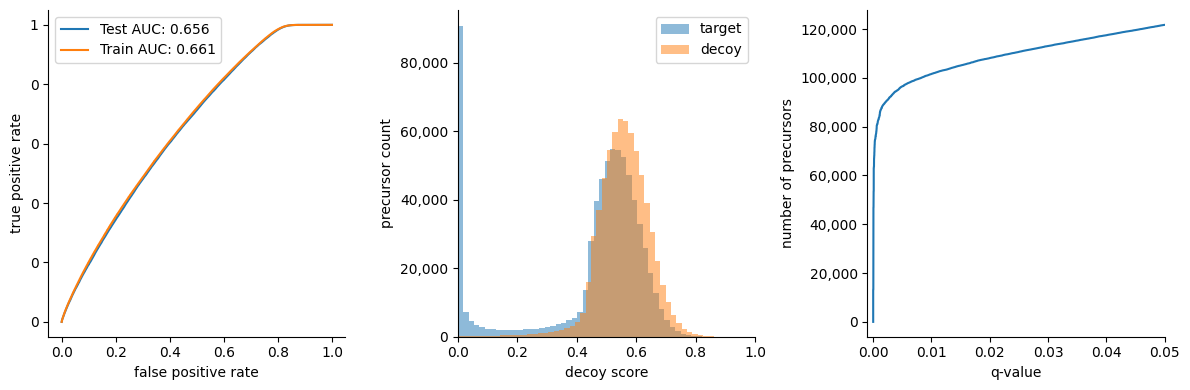

0:07:09.008313 INFO: Resetting torch num_threads to 10


In [ ]:
psm_nb_df = workflow.fdr_correction(features_df, fragments_df)

In [ ]:
psm_nb_df[psm_nb_df['qval'] < 0.01]

In [29]:
psm_rs_df = psm_rs_df[psm_rs_df['qval'] < 0.01]

In [30]:
psm_rs_df['charge'].value_counts()

charge
2    61797
3    27435
4     4983
5      328
1       90
6       27
Name: count, dtype: int64

In [38]:
psm_nb_df = psm_nb_df[psm_nb_df['qval'] < 0.01]
psm_nb_df['charge'].value_counts()

charge
2    64624
3    30676
4     5819
5      395
1       79
6       29
Name: count, dtype: int64

## Multistep Search

In [ ]:
from alphadia.search_plan import SearchPlan

config = {
    "raw_paths": raw_data_path_list,
    "library_path": library_path,
}

plan = SearchPlan(output_folder, config=config)
plan.run_plan()